In [1]:
import os
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from scipy import stats


In [2]:
current_directory = "/Users/mlabhishek/Documents/Assignment for DS Candidates"

In [3]:
data = pandas.read_csv(r"loan_data.csv")

/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

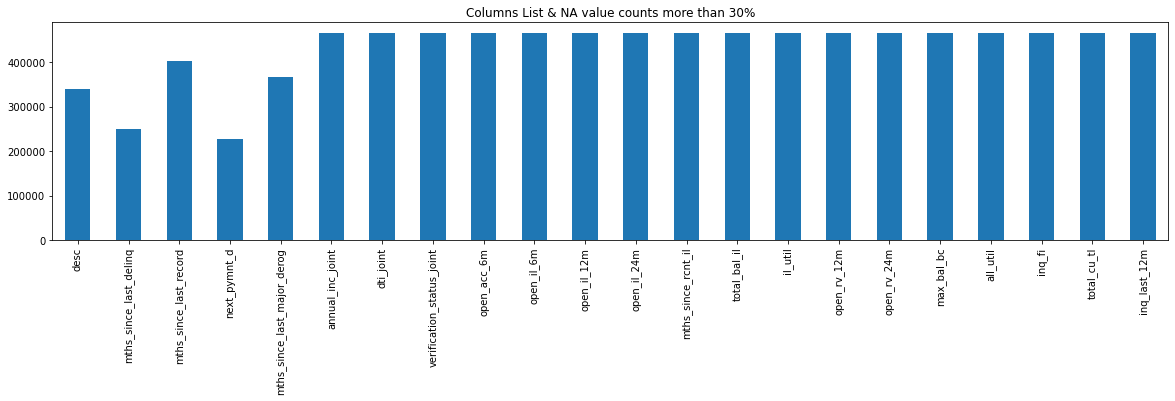

In [6]:
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col.values >(0.2*len(data))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts more than 30%')
plt.show()

In [7]:
NA_col[NA_col.values >(0.2*len(data))]

desc                           340302
mths_since_last_delinq         250351
mths_since_last_record         403647
next_pymnt_d                   227214
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
total_cu_tl                    466285
inq_last_12m                   466285
dtype: int64

In [8]:
data.isnull().sum()/len(data)*100

id                    0.000000
member_id             0.000000
loan_amnt             0.000000
funded_amnt           0.000000
funded_amnt_inv       0.000000
                       ...    
all_util            100.000000
total_rev_hi_lim     15.071469
inq_fi              100.000000
total_cu_tl         100.000000
inq_last_12m        100.000000
Length: 74, dtype: float64

In [9]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [10]:
## Data Cleaning function for handling nulls and remove Nulls ##

In [11]:
def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("nNumber of Rows droppedt: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns droppedt: ",len(colnames))
    print("nOld dataset rows,columns",ishape,"nNew dataset rows,columns",df.shape)
    return df

In [12]:
# Remove columns where NA values are more than or equal to 30%
data = removeNulls(data, axis =1,percent = 0.3)

Number of Columns droppedt:  22
nOld dataset rows,columns (466285, 74) nNew dataset rows,columns (466285, 52)


In [13]:
# Remove any rows with NA values greater than or equal to 30%.
data = removeNulls(data, axis =1,percent = 0.3)

Number of Columns droppedt:  0
nOld dataset rows,columns (466285, 52) nNew dataset rows,columns (466285, 52)


In [14]:
# Remove all columns with only one unique value.
unique = data.nunique()
unique = unique[unique.values == 1]

In [15]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (466285, 50) rows & columns.


In [16]:
#nEmployment Term: Replace the value of ‘n/a’ with self-employed.’
print(data.emp_length.unique())
data.emp_length.fillna('0',inplace=True)
data.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(data.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [17]:
print(data.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [18]:
print(data.zip_code.unique())

['860xx' '309xx' '606xx' '917xx' '972xx' '852xx' '280xx' '900xx' '958xx'
 '774xx' '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx'
 '770xx' '335xx' '799xx' '605xx' '103xx' '150xx' '326xx' '564xx' '141xx'
 '080xx' '330xx' '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '604xx'
 '292xx' '088xx' '180xx' '029xx' '700xx' '010xx' '441xx' '104xx' '061xx'
 '616xx' '947xx' '914xx' '765xx' '980xx' '017xx' '752xx' '787xx' '077xx'
 '540xx' '225xx' '440xx' '437xx' '559xx' '912xx' '325xx' '300xx' '923xx'
 '352xx' '013xx' '146xx' '074xx' '786xx' '937xx' '331xx' '115xx' '191xx'
 '114xx' '908xx' '902xx' '992xx' '750xx' '950xx' '329xx' '226xx' '614xx'
 '802xx' '672xx' '083xx' '100xx' '926xx' '931xx' '712xx' '060xx' '707xx'
 '342xx' '895xx' '430xx' '919xx' '996xx' '891xx' '935xx' '801xx' '928xx'
 '233xx' '927xx' '970xx' '211xx' '303xx' '070xx' '194xx' '263xx' '403xx'
 '301xx' '553xx' '993xx' '312xx' '432xx' '602xx' '216xx' '151xx' '971xx'
 '305xx' '334xx' '050xx' '129xx' '925xx' '483xx' '7

In [19]:
# Remove any columns that aren’t relevant.

In [20]:
not_required_columns = ["id","member_id","url","zip_code"]
data.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (466285, 46) rows & columns.


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

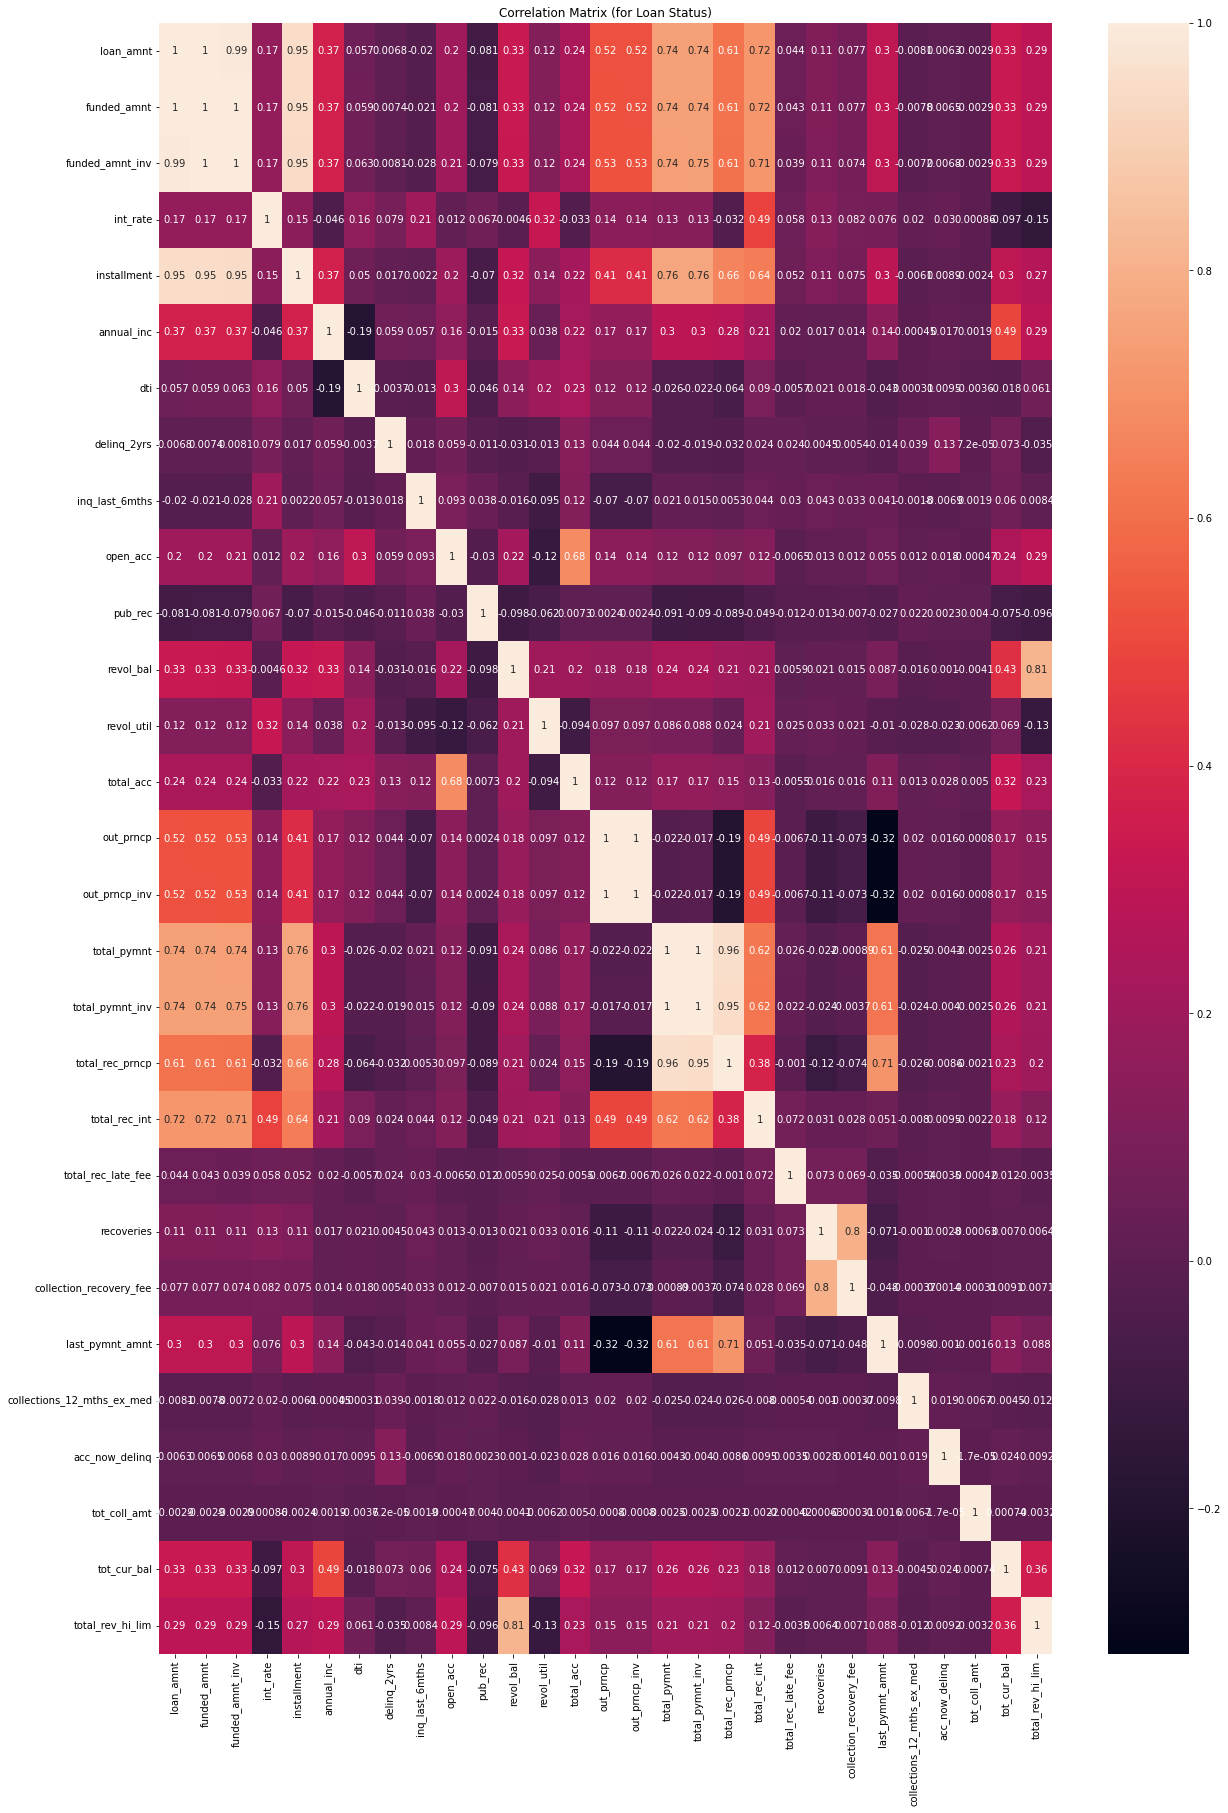

In [21]:
plt.figure(figsize=(20,30))
seaborn.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [22]:
# Convert all continuous variables to numeric values.
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
data[numeric_columns] = data[numeric_columns].apply(pandas.to_numeric)

In [23]:
data[numeric_columns] = data[numeric_columns].apply(pandas.to_numeric)

In [24]:
# Loan purpose: Remove records with values less than 0.75%.
(data.purpose.value_counts()*100)/len(data)

debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64

In [25]:
data.purpose.value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [26]:
del_loan_purpose = (data.purpose.value_counts()*100)/len(data)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]
data.drop(labels = data[data.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")
print(data.purpose.unique())

So now we are left with (431729, 46) rows & columns.
['credit_card' 'car' 'small_business' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical']


In [27]:
# Loan Status: Remove all records with a value of less than 1.5%.
(data.loan_status.value_counts()*100)/len(data)

Current                                                48.912860
Fully Paid                                             39.094432
Charged Off                                             8.898869
Late (31-120 days)                                      1.494688
In Grace Period                                         0.683299
Does not meet the credit policy. Status:Fully Paid      0.346977
Late (16-30 days)                                       0.260349
Default                                                 0.178353
Does not meet the credit policy. Status:Charged Off     0.130174
Name: loan_status, dtype: float64

In [28]:
del_loan_status = (data.loan_status.value_counts()*100)/len(data)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
data.drop(labels = data[data.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")
print(data.loan_status.unique())

So now we are left with (418372, 46) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [29]:
(data.loan_status.value_counts()*100)/len(data)

Current        50.474458
Fully Paid     40.342566
Charged Off     9.182976
Name: loan_status, dtype: float64

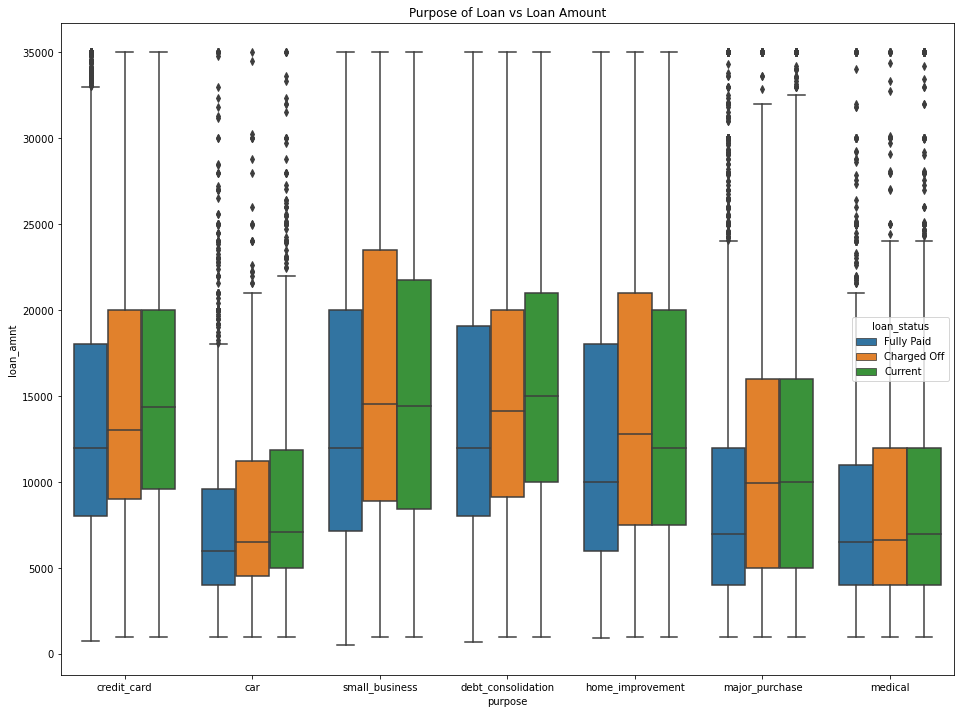

In [30]:
# Purpose of Loan / Loan Amount for loan status
plt.figure(figsize=(16,12))
data['loan_amnt'] = data['loan_amnt'].astype('float')
seaborn.boxplot(data =data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [31]:
# univariate plots
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    seaborn.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        seaborn.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        seaborn.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        seaborn.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pandas.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = seaborn.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


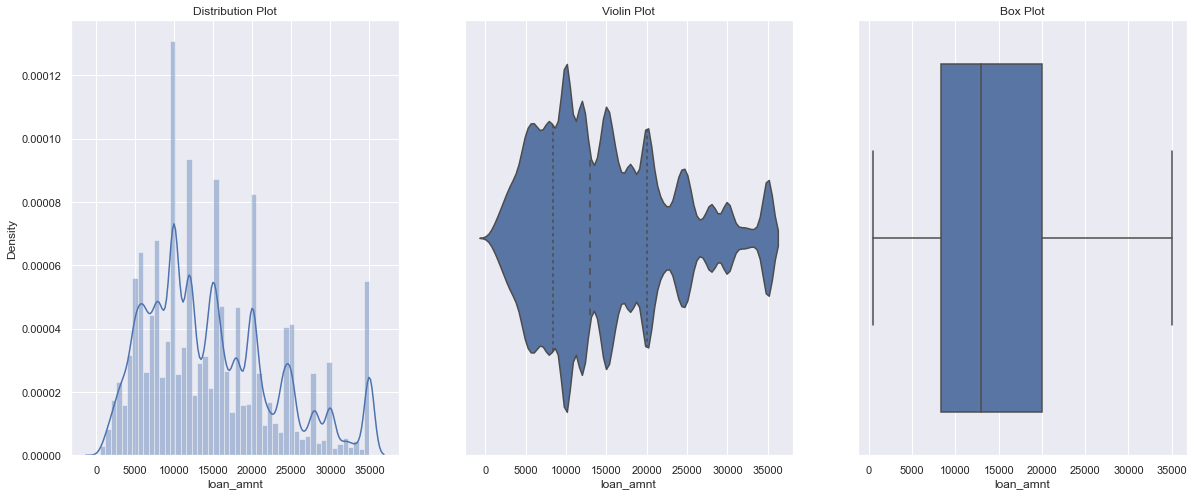

In [32]:
# loan amount
univariate(df=data,col='loan_amnt',vartype=0)

/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


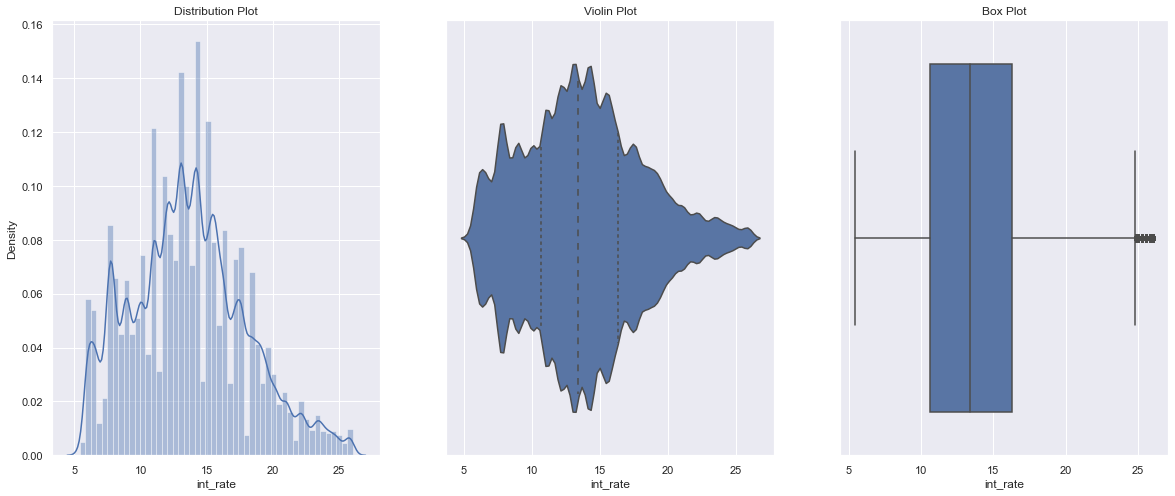

In [33]:
# Interest Rate
data['int_rate'] = data['int_rate'].replace("%","", regex=True).astype(float)
univariate(df=data,col='int_rate',vartype=0)

In [34]:
# Annual Income
data["annual_inc"].describe()

count    4.183720e+05
mean     7.370882e+04
std      5.526093e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.370000e+04
75%      9.000000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [35]:
# Remove Outliers (values from 99 to 100%)
q = data["annual_inc"].apply(lambda x: float(x)).quantile(0.995)
data = data[data["annual_inc"].apply(lambda x: float(x)) < q]
data["annual_inc"].describe()

count    416156.000000
mean      71705.536605
std       38025.016250
min        3000.000000
25%       45000.000000
50%       63000.000000
75%       88580.250000
max      299999.000000
Name: annual_inc, dtype: float64

/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mlabhishek/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


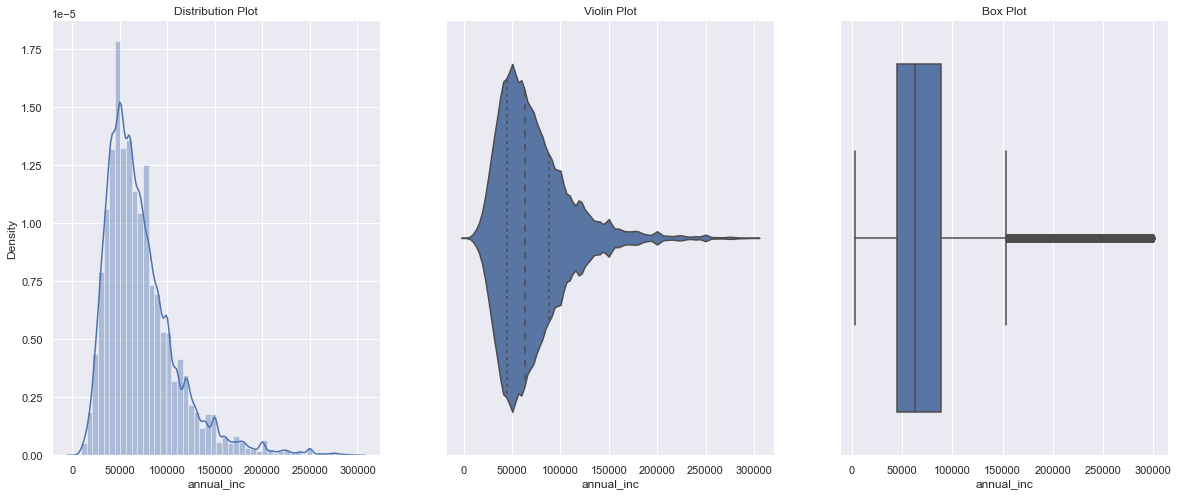

In [36]:
data['annual_inc'] = data['annual_inc'].apply(lambda x: float(x))
univariate(df=data,col='annual_inc',vartype=0)

/var/folders/w1/mh6jt46j7td9gyppzt8_frl40000gn/T/ipykernel_7029/2001472299.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pandas.Series(data = hue)


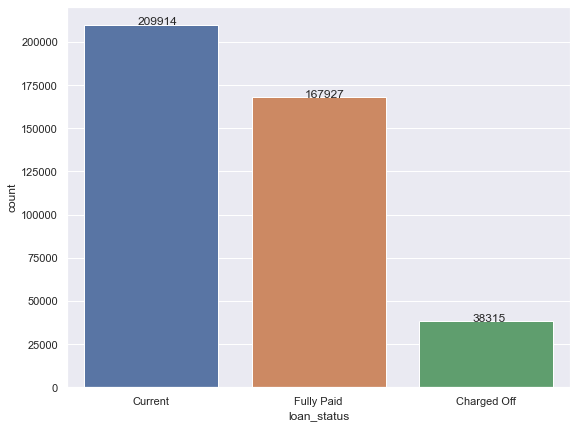

In [37]:
# Loan Status
univariate(df=data,col='loan_status',vartype=1)

In [38]:
# Home Ownership Wise Loan
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'debt_consolidation',
       'home_improvement', 'major_purchase', 'medical'], dtype=object)

In [39]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [40]:
#  Remove rows where home_ownership’==’OTHER’, ‘NONE’, ‘ANY’
rem = ['OTHER', 'NONE', 'ANY']
data.drop(data[data['home_ownership'].isin(rem)].index,inplace=True)
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

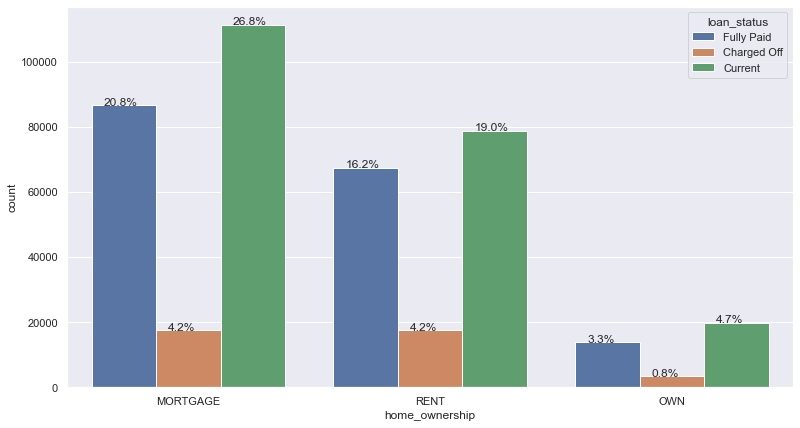

In [41]:
univariate(df=data,col='home_ownership',vartype=1,hue='loan_status')

In [42]:
data.columns.value_counts()

loan_amnt                     1
total_rec_int                 1
revol_bal                     1
revol_util                    1
total_acc                     1
initial_list_status           1
out_prncp                     1
out_prncp_inv                 1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_late_fee            1
funded_amnt                   1
recoveries                    1
collection_recovery_fee       1
last_pymnt_d                  1
last_pymnt_amnt               1
last_credit_pull_d            1
collections_12_mths_ex_med    1
acc_now_delinq                1
tot_coll_amt                  1
tot_cur_bal                   1
pub_rec                       1
open_acc                      1
inq_last_6mths                1
earliest_cr_line              1
funded_amnt_inv               1
term                          1
int_rate                      1
installment                   1
grade                         1
sub_grad

In [43]:
data['loan_status'].nunique()

3

In [44]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,...,415989.000000,415989.000000,415989.000000,415989.000000,415989.000000,415948.000000,415989.000000,358724.000000,3.587240e+05,3.587240e+05
mean,14634.772434,14610.924387,14559.869800,13.640744,440.389524,71708.193611,17.379949,0.280243,0.773496,11.272276,...,2616.541960,0.513420,87.406681,9.112275,3261.931015,0.009092,0.003966,166.310169,1.385801e+05,3.053215e+04
std,8186.873946,8175.128750,8186.573104,4.287815,240.107508,38025.853647,7.780599,0.787479,1.029647,4.966450,...,2472.174704,4.627388,557.574080,84.178518,5663.015253,0.109350,0.068386,1584.514562,1.438193e+05,2.812837e+04
min,500.000000,500.000000,0.000000,5.420000,16.250000,3000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8250.000000,8200.000000,8000.000000,10.640000,267.060000,45000.000000,11.570000,0.000000,0.000000,8.000000,...,990.700000,0.000000,0.000000,0.000000,323.380000,0.000000,0.000000,0.000000,2.927175e+04,1.390000e+04
50%,12900.000000,12800.000000,12750.000000,13.350000,388.310000,63000.000000,17.020000,0.000000,0.000000,10.000000,...,1856.330000,0.000000,0.000000,0.000000,561.490000,0.000000,0.000000,0.000000,8.482700e+04,2.330000e+04
75%,20000.000000,20000.000000,20000.000000,16.290000,574.360000,88600.000000,22.900000,0.000000,1.000000,14.000000,...,3338.260000,0.000000,0.000000,0.000000,3638.720000,0.000000,0.000000,0.000000,2.106212e+05,3.840000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,299999.000000,39.990000,29.000000,8.000000,84.000000,...,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,296368.000000,3.610743e+06,1.314900e+06
